In [172]:
import matplotlib.pyplot as plt
import csv
import numpy as np

ymin = 49.8
ymax = 50.2
xmin = 19.8
xmax = 20.2

with open("../datasets/podst-ext.csv", "r") as f1:
    reader_g = csv.reader(f1)
    with open("../datasets/podst-loc.csv", "r") as f2:
        reader_loc = csv.reader(f2)
        
        data_loc = []
        for l in reader_loc:
            data_loc.append(l)
        
        locations = []
        i = 0
        for g in reader_g:
            for l in data_loc:
                if g[0] == l[0]:
                    #g[1] == 'm.Kraków'
                    if float(l[2]) > ymin and float(l[2]) < ymax and float(l[3]) > xmin and float(l[3]) < xmax:
                        locations.append((float(l[2]), float(l[3]), float(g[20]))) 


print(locations)
        
print(len(locations), len(data_loc))
locations = np.asarray(locations)



[(50.1849339, 19.933165, 0.65318073220853), (50.1876691, 20.0669787, 0.5798224735134914), (50.1763906, 20.1301443, 0.5265874240817738), (50.1274676, 20.1887579, 0.6388965049632633), (50.1359886, 20.1131277, 0.6816473628943621), (50.1446573, 20.1090842, 0.4936817432329518), (50.192732, 20.157495, 0.3016408821763959), (50.1633217, 20.0823911, 0.48840129660163806), (50.1422827, 20.0724882, 0.5057636339215688), (50.15505690000001, 20.1484496, 0.6033344492442196), (50.1128299, 20.0840592, 0.5542026827266247), (50.0461033, 19.803004, 0.6251554701664125), (50.1179469, 20.0351705, 0.5703737324689259), (50.1583429, 19.978803, 0.6244951817105494), (49.9608099, 19.900185, 0.5703981668842616), (49.9444387, 19.8485722, 0.4460761902408916), (49.9381586, 19.9323718, 0.5949320408365947), (49.9719454, 19.8984221, 0.7495694645915396), (49.9676057, 19.9293602, 0.4319792362998203), (49.942154, 19.8893939, 0.6783404044801817), (49.914262, 19.9032024, 0.49982505047436115), (50.1964729, 19.8732698, 0.4908654

In [173]:
with open("../datasets/loc-val.csv", "w") as f:
    writer = csv.writer(f)
    
    for e in locations:
        writer.writerow(e)

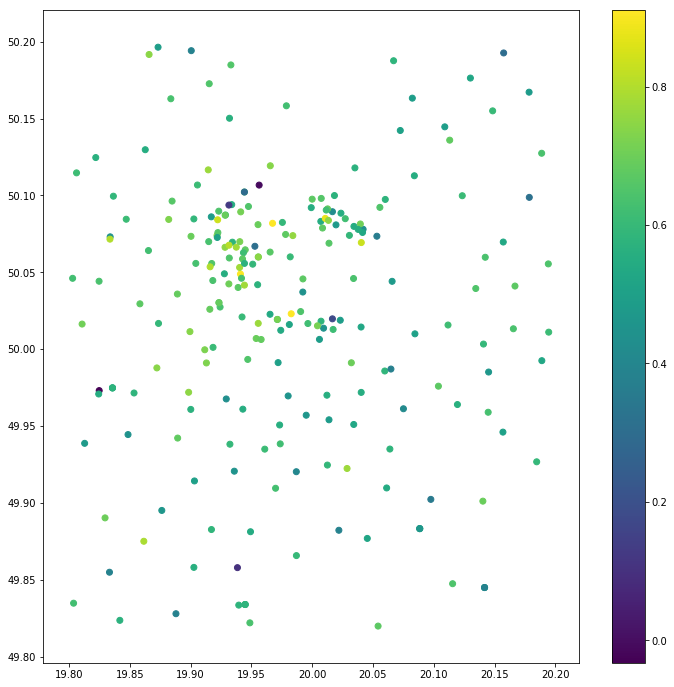

In [158]:
# %pylab inline
# pylab.rcParams['figure.figsize'] = (12, 12)

plt.scatter(locations[...,1], locations[...,0], c = locations[...,2], marker = 'o')
    
plt.colorbar()
plt.show()


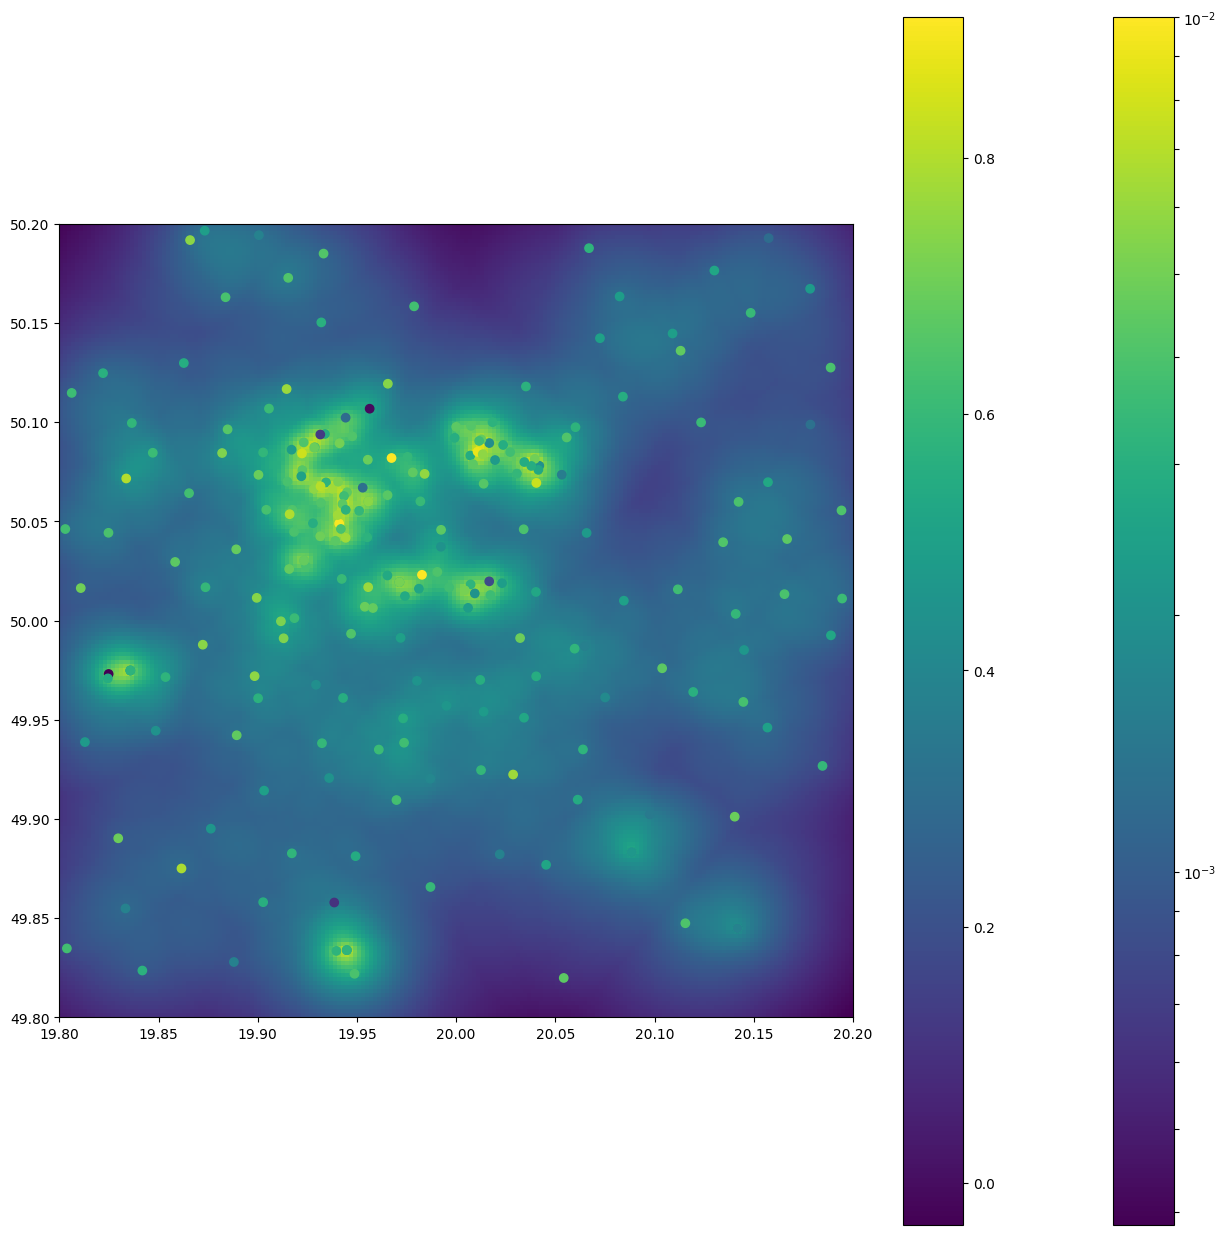

In [171]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize
import math as m
import random as r
import csv
from geopy.distance import vincenty as geopyDist

LICZBA_ZNACZACYCH_SZKOL = 5

# Parametry grafiki
plt.figure(figsize=(16, 16), dpi=100, facecolor='w', edgecolor='k')

size = 0.2
array_size = 200

# ta funkcja zamienia indeksy i,j na odpowiadające im punkty na płaszczyźnie
def makePoint(i, j, array_size, size, xmin, ymin):
    i, j, array_size, size = float(i), float(j), float(array_size), float(size)
    
    side = 2*size/array_size # dl boku w jednostkach na mapie
    i = array_size -i -1
    
    ni = i*side + side/2
    nj = j*side + side/2
    
    return (nj + xmin, ni + ymin)

def myDist(lon1, lat1, lon2a, lat2a):
    # approximate radius of earth in km
    R = 6373.0

    dlon = lon2a - lon1
    dlat = lat2a - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2a) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c

    return distance

def education_cost(x, locations):
    lng, lat = x
    
#     diff_lat = (locations[...,0] * 1000 - lat *1000) ** 2
#     diff_lng = (locations[...,1] *1000 - lng *1000) ** 2
#     diff = diff_lat + diff_lng
#     diff = np.sqrt(diff)
#     diff = []
#     for i in range(len(locations)):
#         diff.append(geopyDist((lat, lng), locations[i][:2]).km)
#     diff = np.asarray(diff)  
    diff = myDist(lng, lat, locations[...,1], locations[...,0])
    
#     b = np.zeros((locations.shape[0], locations.shape[1]+1))
#     b[:,:-1] = locations
#     b[:,-1:] = np.reshape(diff,(diff.size, 1))
    sort = np.argsort(diff)
    sort = sort[:LICZBA_ZNACZACYCH_SZKOL]
    diff = diff[sort]
    locations = locations[sort]
#     print(locations)
    values = locations[...,2]/ diff
    
    return 1/np.sum(diff)

# Generacja heat-mapy
dummy = []
cost = np.zeros((array_size, array_size))
for i in range(len(cost)):
    for j in range(len(cost[i])):
        cost[i, j] = education_cost(makePoint(i, j, array_size, size, xmin, ymin), locations)

# Rysowanie obrazka
im = plt.imshow(cost, norm = matplotlib.colors.LogNorm(), extent = (xmin, xmax, ymin, ymax))
plt.colorbar()

plt.scatter(locations[...,1], locations[...,0], c = locations[...,2], marker = 'o')
    
plt.colorbar()
plt.show()

# ax = plt.gca()
# for i in range(len(ancors)):
#     circle = plt.Circle(ancors[i], mypoint[i], color='r', fill=False, zorder = 0.2, label='Odległości od punktów pomiarowych')
#     ax.add_artist(circle)
    
# black_dots = plt.scatter([1, -1, 1, -1], [1, 1, -1, -1], color = 'black', label='Punkty pomiarowe')

# steps = np.asarray(steps)
# line = plt.Line2D(steps[...,0] , steps[...,1], color='grey', zorder = 0.3, label='Ścieżka algorytum opymalizującego')
# ax.add_artist(line)

# punkt,  = plt.plot(result.x[0], result.x[1], 'o', color='pink', zorder = 1.0, label = 'Wyznaczony punkt')

# plt.colorbar(im)
# plt.legend(handles=[black_dots, circle, line, punkt], loc ='upper right')#bbox_to_anchor=(0.3, -0.05))
# plt.title("Heat-mapa na obrazku przedstawia funkcję kosztu(MSE), \n wyznaczoną jako suma kwadratów błedów pomiarów od wszystkich punktów pomiarowych.")

# circle2 = plt.Circle(result.x, myMSE(result.x, ancors, mypoint) ** (1/2), color='pink', fill=False, zorder = 1.0)
# ax.add_artist(circle2)

# plt.savefig(savefile, dpi=100, facecolor='w', edgecolor='w')
# print("Zapisano grafikę w pliku %s" % (savefile))